### Question 2:

Implement the Bernstein-Vazirani quantum algorithm for a n-bit to 1 bit function in
qiskit. Show that it works as intended for a = 01011 and a = 1011

In [1]:
# these three import lines are essential for running a quantum circuit 
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute
from qiskit.providers.aer import QasmSimulator

# also import a visualization tool from qiskit
from qiskit.tools.visualization import plot_histogram

# import numpy incase we need it
import numpy as np
%matplotlib inline
from qiskit.tools.visualization import circuit_drawer


In [2]:
def BernsteinVazirani(a,flag=False):
    s = int(a, 2)
    N = len(a)
    circ = QuantumCircuit(N+1, N)
    circ.h(range(N))
    circ.x(N)
    circ.h(N)
    circ.barrier()

    if flag==False: 
        for key, val in enumerate(reversed(a)):
            if val == "1": #To check where to place the CX
                circ.cx(key, N)
    else:        
        for i in range(0,N):
            # Apply the inner-product oracle
            if (s & (1 << i)):
                circ.z(i)
            else:
                circ.iden(i)

    circ.barrier()
    circ.h(range(N))
    circ.barrier()
    circ.measure(range(N),range(N))
            
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(circ,simulator,shots=1)
    result = job.result()
    counts = result.get_counts()
    print("The bit string in decimal is ", s)
    print("Counts:",counts)
    return circ

The bit string in decimal is  11
Counts: {'01011': 1}


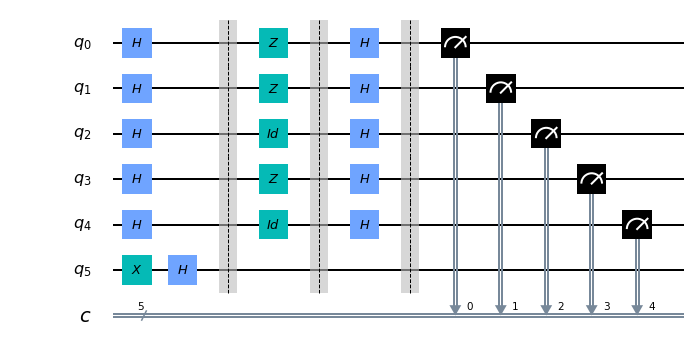

In [3]:
circuit = BernsteinVazirani("01011", True)
circuit_drawer(circuit, output='mpl')

The bit string in decimal is  11
Counts: {'01011': 1}


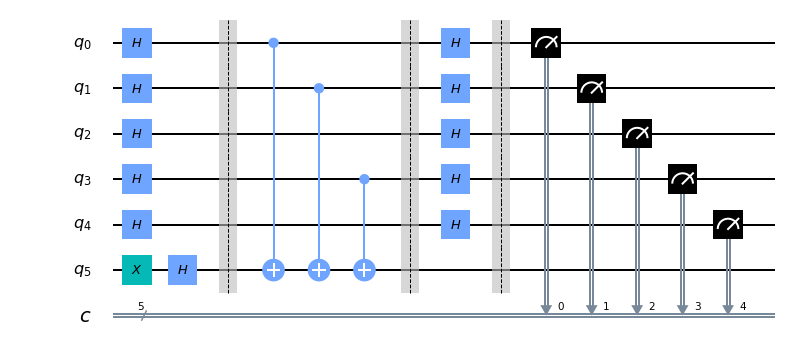

In [4]:
circuit = BernsteinVazirani("01011", False)
circuit_drawer(circuit, output='mpl')

The bit string in decimal is  11
Counts: {'1011': 1}


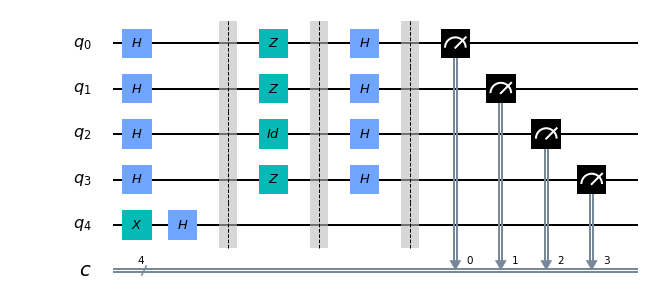

In [5]:
circuit = BernsteinVazirani("1011", True)
circuit_drawer(circuit, output='mpl')

The bit string in decimal is  11
Counts: {'1011': 1}


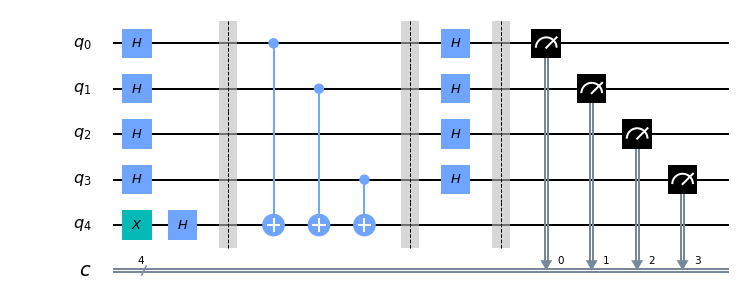

In [6]:
circuit = BernsteinVazirani("1011", False)
circuit_drawer(circuit, output='mpl')

### References:

https://qiskit.org/textbook/ch-algorithms/bernstein-vazirani.html?fbclid=IwAR3HsodYG04VmBYxOdhQYwJYmRZ-fF6VoML5EeTN6Y4N_V_WbChLgzQvDII

https://qiskit.org/documentation/stubs/qiskit.visualization.circuit_drawer.html